Сделайте копию ноутбука (файл => создать копию на диске). Переименуйте, добавив в название ФИО и номер группы


## Задание 1.1

### Подготовка

In [ ]:
%%capture
!pip install numpy matplotlib scikit-image

In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Скачайте цветную картинку (нужно вписать URL)

In [2]:
%%capture
! wget https://m.media-amazon.com/images/M/MV5BYTU1ZDBjOTUtMjMxMC00OGM0LTgyZWUtOGRhNmNmY2I5OGYwXkEyXkFqcGdeQXVyMTEwOTMwMjk0._V1_.jpg

Эта картинка представляет собой матрицу с тремя каналами: R, G и B. Выведите картинку и её размеры.

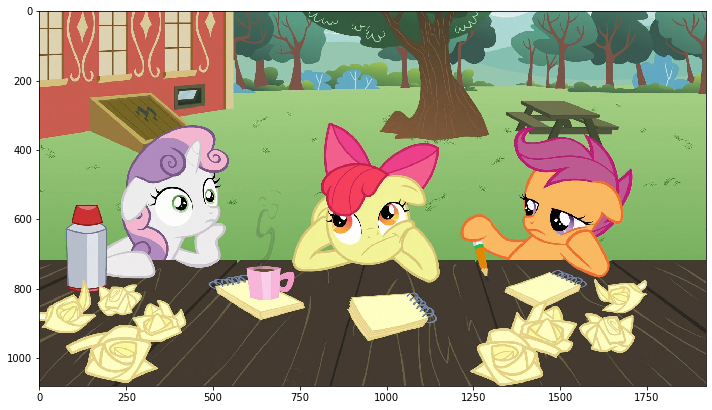

In [3]:
plt.figure(figsize=(10, 10))
img = imread('MV5BYTU1ZDBjOTUtMjMxMC00OGM0LTgyZWUtOGRhNmNmY2I5OGYwXkEyXkFqcGdeQXVyMTEwOTMwMjk0._V1_.jpg')
imshow(img)

In [4]:
img.shape

(1080, 1920, 3)

Y = 0.299 ∗ R + 0.587 ∗ G + 0.114 ∗ B

Cb = −0.1687 ∗ R − 0.3313 ∗ G + 0.5 ∗ B + 128

Cr = 0.5 ∗ R − 0.4187 ∗ G − 0.0813 ∗ B + 128

Выше приведены формулы для перевода RGB в формат YCbCr. В этом формате Y представляет собой картинку в градациях серого (grayscale). 

Переведите картинку в формат YCbCr, используя формулы, описанные выше. Выведите каналы Y, Cb и Cr отдельно.

In [5]:
def RGB_to_YCbCr(image):  # функция для перевода изображения из формата RGB в формат YCbCr
  R = image[:, :, 0]
  G = image[:, :, 1]
  B = image[:, :, 2]
  Y = np.clip(0.299 * R + 0.587 * G + 0.114 * B, 0, 255)
  Cb = np.clip(-0.1687 * R - 0.3313 * G + 0.5 * B + 128, 0, 255)
  Cr = np.clip(0.5 * R - 0.4187 * G - 0.0813 * B + 128, 0, 255)
  return np.dstack([Y, Cb, Cr]).astype('uint8')

Изображение в формате YCbCr:

In [46]:
img_YCbCr = RGB_to_YCbCr(img)

In [7]:
def triple(arr):  # без этого картинки зеленые получаются, потому что канал один
  return np.dstack((arr, arr, arr))

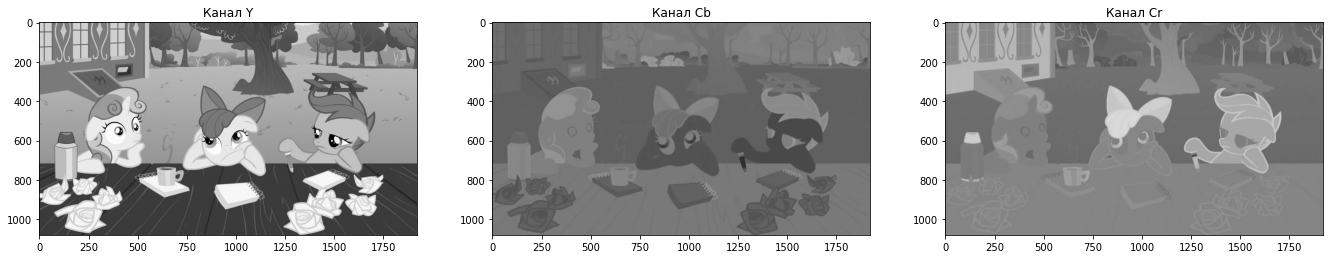

In [47]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(23, 10))
for i in range(3):
  axes[i].imshow(triple(img_YCbCr[:, :, i]))
  axes[i].set(title = f"Канал {'Y' if i==0 else 'Cb' if i==1 else 'Cr'}")

В задании 1.1 нужно будет работать только с каналом Y. Предварительно сделайте его копию Y_copy, так как этот канал понадобится нам в задании 1.2 в неизменённом виде.

In [9]:
Y = img_YCbCr[:, :, 0]
Cb = img_YCbCr[:, :, 1]
Cr = img_YCbCr[:, :, 2]

In [10]:
Y_copy = Y.copy()

### Теория

Дан сигнал $X$ предстваляющий собой последовательность значений $x_i$. Для X известно (или может быть легко вычислено) множество допустимых значений. Это множество допустимых значений может быть бесконечным, например, множество действительных чисел.

В задаче квантования элементам последовательности $X$ сопоставить элементы из множества $Y$. При этом множество $Y$ обязательно конечно и включает в себя меньшее чем в $X$ количество различных элементов.

Множесnво $Y$ называют *аппроксимирующим множеством*. Элементы из этого множества называют *аппроксимирующими значениями*.



**Входная последовательность** - исходная последовательность элементов. 

**Квантование** — это разбиение диапазона допустимых значений сигнала $X$ на конечное число уровней и это округление этих значений до ближайших к ним уровней, то есть сопоставлением каждому $x_i$ ближайших к ним аппроксимирующих значений.

**Равномерное квантование** — разбиение диапазона значений отсчётов на отрезки равной длины. Такие отрезки называют *квантами*. При этом обычно аппроксимирующие значения выбираются в центрах этих отрезков. При неравномерном квантовании отрезки могут быть разной длины, а аппроксимирующие значения могут находится не в центрах отрезков.



Обозначим через $Q$ множество номеров квантов. **Квантованная последовательность** - это последовательность номеров квантов, которые соответствуют элементам входной последовательности.

**Восстановленная последовательность** - это последовательность аппроксимирующих значений, соответствующих элементам входной последовательности.

**Скалярное квантование** — одному элементу из $X$ сопоставляется ровно одно аппроксимирующее значение. При векторном квантовании одно аппроксимирующее значение может быть сопоставлено сразу нескольким элементам из $X$. 

В **равномерном квантовании с переменной скоростью** изначально задаётся ширина квантов (обычно её назвают шаг, step). В равномерном квантовании с постоянной скоростью задаётся количество бит, которые нужно потратить на один отчёт в квантованной последовательности. Вычислительно квантование с постоянной скоростью значительно сложнее, так как нужно находить границы квантов и определять, попадает ли элемент входной последовательность внутрь кванта. 


Разберём на примере. Допустим у нас есть grayscale изображение. Яркость пикселей - это входная последовательность. Множество допустимых значений элементов входной последовательность: целые числа от 0 до 255. В результате квантования каждый элемент входной последовательности будет заменён ближайшим элементов их аппроксимирующего множества. 

Получим сначала квантованную последовательность. Для этого нам необходимо задать ширину кванта $step$. В задаче с яркостью изображений ширина кванта задаётся степенью числа $2$. (Фактически в исходном изображении у нас шаг $1$, то есть $2^0$. Допустим, $step = 2^2 = 4$.

Обозначим через $y_q$ - элемент восстановленной последовательности. Тогда, $y_{q}=\left(\left\lfloor {x_i \over step}\right\rfloor +0.5\right)\cdot step$. При этом $\lfloor {x_i \over step} \rfloor$ - это номер соответствующего кванта.

Допустим в исходной последовательности встретились пиксели яркости 71, 73, 74. Тогда соответствующие им номера квантов будут равняться 17, 18, 18, а элементы восстановленной последовательности будут равнятся 70, 74, 74

### Формулировка задания

Напишите алгоритм **равномерного скалярного квантования с переменной скоростью**. Примените его к картинке Y_copy. Выведите получившуюся картинку. Вам потребуется подобрать значение $step$ такое, чтобы качество картинки оставалось приемлемым. Выведите первые 10 элементов входной последовательности, квантованной последовательности, восстановленной последовательности. Выведите элементы аппроксимирующего множества.

In [11]:
def quantize(arr, step, print_info=False):
  arr_appr = arr // step
  arr_quantized = np.clip((arr_appr + 0.5) * step, 0, 255).astype('uint8')
  if print_info:
    print("Первые 10 элементов входной последовательности:", *np.ravel(arr)[:10])
    print("Первые 10 элементов квантованной последовательности:", *np.ravel(arr_appr)[:10])
    print("Первые 10 элементов восстановленной последовательности:", *np.ravel(arr_quantized)[:10])
    print("Элементы аппроксимирующего множества:", *np.unique([int(np.clip((i // step + 0.5) * step, 0, 255)) for i in range(0, 255)]))
  return arr_quantized

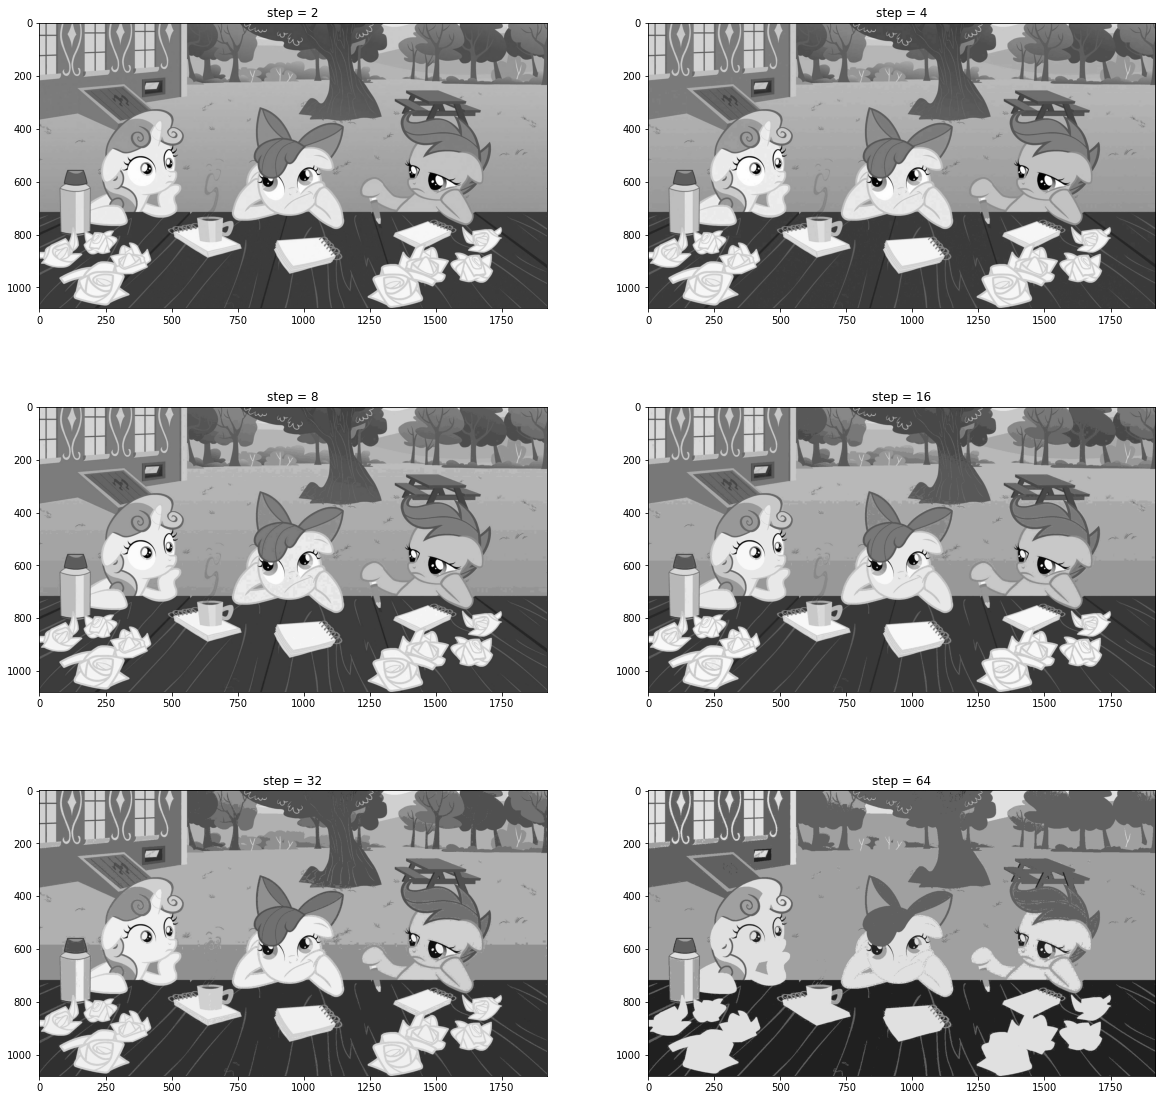

In [12]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(20, 20))
for i in range(3):
  for j in range(2):
    axes[i, j].imshow(quantize(triple(Y_copy), 2**(i*2+j+1)))
    axes[i, j].set(title = f'step = {2**(i*2+j+1)}')

Как видно по картинкам, при шаге 2 и 4 изменения практически не заметны, а после шага 8 картинка начинает быстро терять качество (достаточно взглянуть на поле за спинами поняшек или на Эпплблум). При шаге 4 изменения едва видны, но они не ухудшают восприятие картинки, значит это и есть лучший шаг.

In [13]:
Y_copy = quantize(triple(Y_copy), 4, print_info=True)[:, :, 0]

Первые 10 элементов входной последовательности: 209 209 209 209 209 209 209 209 209 209
Первые 10 элементов квантованной последовательности: 52 52 52 52 52 52 52 52 52 52
Первые 10 элементов восстановленной последовательности: 210 210 210 210 210 210 210 210 210 210
Элементы аппроксимирующего множества: 2 6 10 14 18 22 26 30 34 38 42 46 50 54 58 62 66 70 74 78 82 86 90 94 98 102 106 110 114 118 122 126 130 134 138 142 146 150 154 158 162 166 170 174 178 182 186 190 194 198 202 206 210 214 218 222 226 230 234 238 242 246 250 254


# Задание 1.2

Ранее уже были приведены формулы для перевода из RGB и YCbCr. В этом задании нужно будет работать в основном с каналами Cb и Cr. 

### Теория

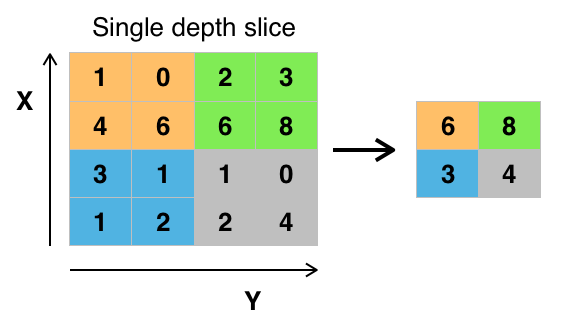

Выше приведена иллюстрация операции, которая называется pooling (точнее max pooling). Эта операция проводится на специальных слоях в свёрточной нейронной сети, предназначенной для анализа изображений. Суть операции сводится к следующему: в исходной матрице выбираются блоки заданного размера (в иллюстрации это блок 2 на 2), в каждом таком блоке выбирается элемент с максимальным значением. Этот максимальный элемент остаётся, а остальные отбрасываются.  

Альтернативой операции max pooling является операция average pooling (в этой операции выбирается не максимальный элемент, а счиается среднее арифметическое, иногда с округлением) 

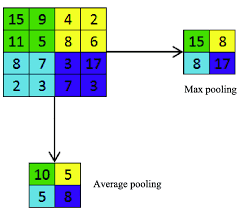

Похожая операция реализуется в стандарте JPEG. Эта часть называется [цветовая субдискретизация](https://ru.wikipedia.org/wiki/%D0%A6%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D1%81%D1%83%D0%B1%D0%B4%D0%B8%D1%81%D0%BA%D1%80%D0%B5%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F). Наиболее распространённый тип субдискретизации это 4:2:0.

Суть этого подхода к обработке изображений сводится к следующему. Каналы Cb и Cr называются цветоразностными. Для цветоразностных каналов делается децимация (прореживание, то есть отбрасывание элементов исходной матрицы). Для субдискретизации типа 4:2:0 нужно для в цветоразностных каналах для каждого блока 2 на 2 оставить только одно значение. 

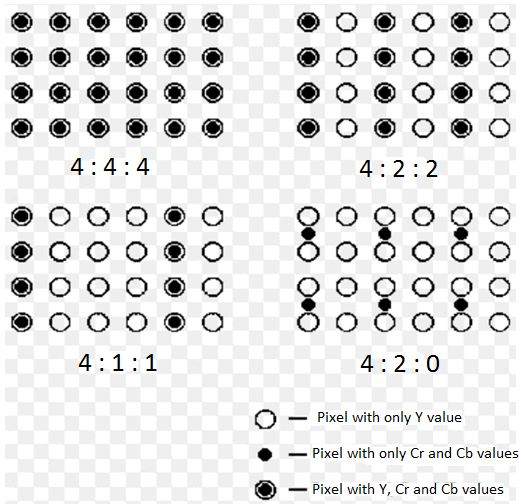

После цветовой субдискретиазации количество элементов в каналах Cb и Cr уменьшится. Для 4:2:0 количество элементов сократится в 4 раза. Чтобы снова перейти от формата YCbCr к RGB нужно восстановить цветоразностные каналы, а затем сделать пересчёт по формулам:

R = Y + 1.402 ∗ (Cr − 128)

G = Y − 0.34414 ∗ (Cb − 128) − 0.71414 ∗ (Cr − 128)

B = Y + 1.772 ∗ (Cb − 128)

## Формулировка задания

In [14]:
def YCbCr_to_RGB(Y, Cb, Cr): # функция делает из трех каналов в формате YCbCr картинку в формате RGB
  Y, Cb, Cr = Y.astype('int'), Cb.astype('int'), Cr.astype('int') # иначе переполнение
  R = np.clip(Y + 1.402 * (Cr - 128), 0, 255)
  G = np.clip(Y - 0.34414 * (Cb - 128) - 0.71414 * (Cr - 128), 0, 255)
  B = np.clip(Y + 1.772 * (Cb - 128), 0, 255)
  return np.dstack([R, G, B]).astype('uint8')

Для каналов Cb и Cr нужно сделать цветовую субдискретизацию типа 4:2:0. Нужно реализовать три типа обработки: прореживание (то есть обрасывание всех элементов кроме одного), среднее и максимальное. 

В отдельной функции (методе) реализуйте восстановление цветоразностных каналов. В результате восстановления размеры этих матриц должны стать такими же как у матрицы Y.

После этого переведите изображение из YCbCr в формат RGB и выведите результат на экран. При переводе используйте каналы Cb, Cr, полученные после восстановления, иначе будет несовпадение по размерам.

Всего должно получится 6 картинок. Для неизменённого канала Y должно получиться три картинки для каждого типа обработки при цветовой субдискретизации. Также три картинки должны получится для канала Y после квантования в задании 1.1.

In [15]:
def random_pooling(arr: np.array): # прореживание
  new_arr = []
  for i in range(0, arr.shape[0], 2):
    arr_curr = []
    for j in range(0, arr.shape[1], 2):
        arr_curr.append(arr[i, j])
    new_arr.append(arr_curr)
  return np.array(new_arr)

def max_pooling(arr: np.array): # максимальное
  new_arr = []
  for i in range(0, arr.shape[0], 2):
    arr_curr = []
    for j in range(0, arr.shape[1], 2):
        arr_curr.append(max(arr[i, j], arr[i+1, j], arr[i, j+1], arr[i+1, j+1]))
    new_arr.append(arr_curr)
  return np.array(new_arr)

def average_pooling(arr: np.array): # среднее
  new_arr = []
  for i in range(0, arr.shape[0], 2):
    arr_curr = []
    for j in range(0, arr.shape[1], 2):
        arr_curr.append(np.uint8((int(arr[i, j]) + int(arr[i+1, j]) + int(arr[i, j+1]) + int(arr[i+1, j+1])) // 4)) # были приколы с переполнением, поэтому int
    new_arr.append(arr_curr)
  return np.array(new_arr)

In [16]:
def go_back(array): # функция возвращения к нормальным размерам после субдискретизации
  new_arr = []
  for row in array:
    line = []
    for elem in row:
      line.extend([elem, elem])
    new_arr.extend([line, line])
  return np.array(new_arr)

In [17]:
r_p = YCbCr_to_RGB(Y, go_back(random_pooling(Cb)), go_back(random_pooling(Cr)))
m_p = YCbCr_to_RGB(Y, go_back(max_pooling(Cb)), go_back(max_pooling(Cr)))
a_p = YCbCr_to_RGB(Y, go_back(average_pooling(Cb)), go_back(average_pooling(Cr)))
r_p_c = YCbCr_to_RGB(Y_copy, go_back(random_pooling(Cb)), go_back(random_pooling(Cr)))
m_p_c = YCbCr_to_RGB(Y_copy, go_back(max_pooling(Cb)), go_back(max_pooling(Cr)))
a_p_c = YCbCr_to_RGB(Y_copy, go_back(average_pooling(Cb)), go_back(average_pooling(Cr)))

Text(0.5, 1.0, 'Average pooling, Y_copy')

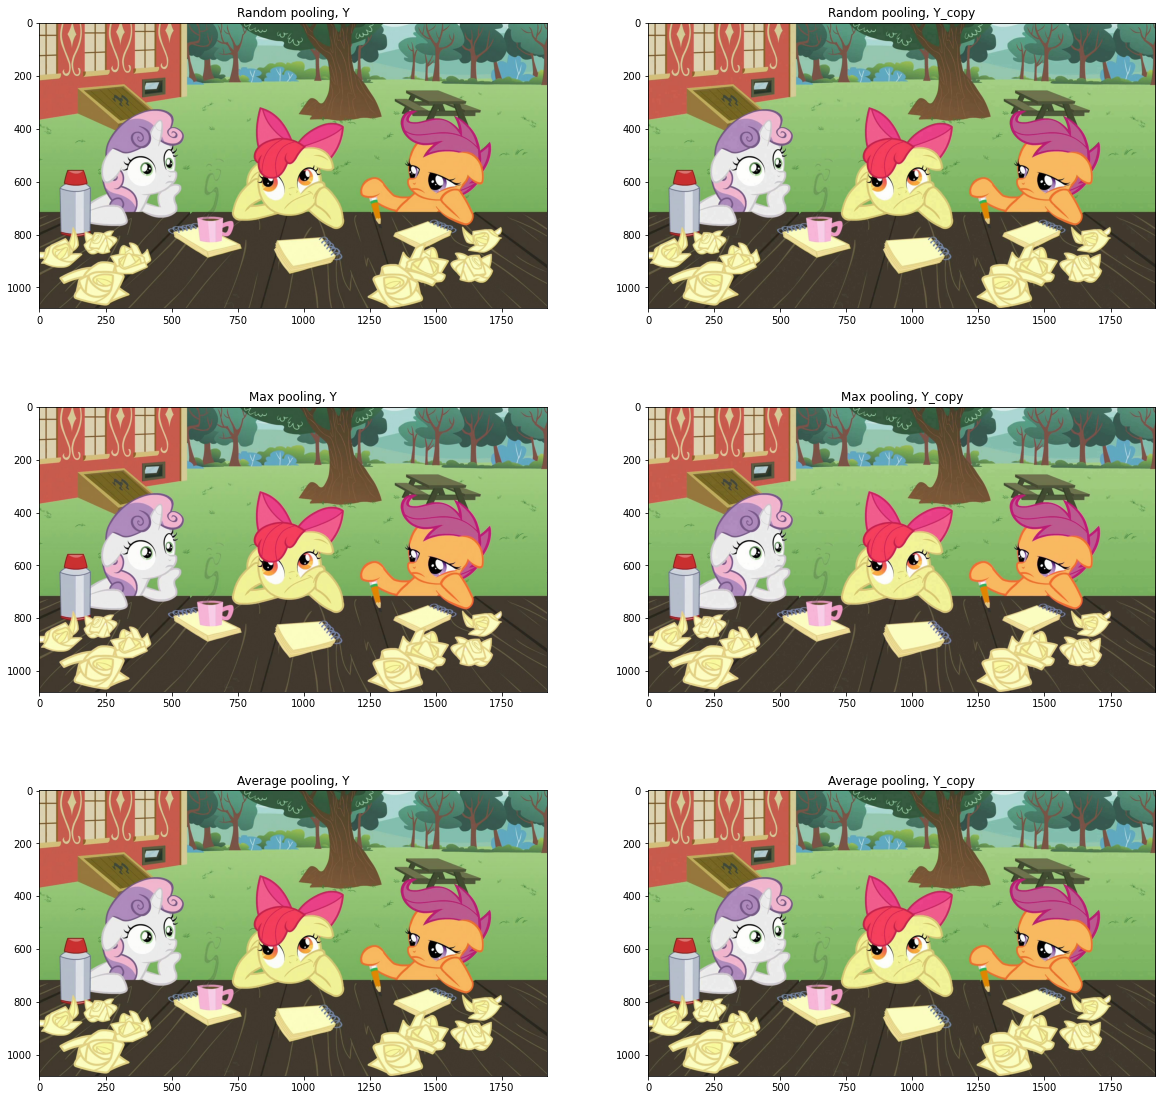

In [18]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(20, 20))  # выводим картиночки

axes[0][0].imshow(r_p)
axes[0][0].set_title('Random pooling, Y')
axes[0][1].imshow(r_p_c)
axes[0][1].set_title('Random pooling, Y_copy')

axes[1][0].imshow(m_p)
axes[1][0].set_title('Max pooling, Y')
axes[1][1].imshow(m_p_c)
axes[1][1].set_title('Max pooling, Y_copy')

axes[2][0].imshow(a_p)
axes[2][0].set_title('Average pooling, Y')
axes[2][1].imshow(a_p_c)
axes[2][1].set_title('Average pooling, Y_copy')

# Задание 3

В этом задании нужно будет оценить качество сжатия данных. Оценивать будем каждую из шести картинок по двум параметрам: RMSE и степень сжатия (через энтропию).

## Теория

MSE и её модификация RMSE (корень квадратный из MSE) - метрики часто использующиеся в разных областях. В частности, их используют в статистики и машинном обучении для оценки качества регрессионной модели.

$$MSE =  \frac{1}{\ell} \sum\limits_{i=1}^\ell (\hat y_{i}  - y_{i})^2 $$

Здесь $\ell$ количество пикселей в картинке (и в исходной и после обработки), $\hat y_{i}$  и $y_{i}$ - яркости пикселей в исходной картинке и в картинке после обработки.

Степень сжатия рассчитывается по формуле:

$C = \frac{H_y}{H_{\hat y}}$

$H_y$ - это среднее количество бит на один пиксель в исходном изображении. В этом задании это должно быть 24 бита.

$H_{\hat y}$ - это оценка среднего количества бит на один пиксель в изображении после обработки.


Для оценки $H_{\hat y}$ потребуется вычисление энтропию для последовательности элементов. Также это значение должно учитывать проведённую в задании 1.2 субдискретизацию. То есть **вы должны рассчитывать среднее количество бит не на восстановленном изображении, а на закодированном**. Помните о том, что в закодированном изображении количество элементов матрицы в два раза меньше.

Энтропия Шеннона для системы с N возможными состояниями определяется по формуле:
$$H = - \sum_{i=0}^{N} p_i\log_2p_i $$

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. Вероятность может быть оценена через частоту.

Это очень важное понятие теории информации, которое позволяет оценить количество информации (степень хаоса в системе). Чем выше энтропия, тем менее упорядочена система и наоборот. С помощью энтропии мы рассчитывем среднее количество бит на элемент последовательности, при условии что эту последовательность получится оптимально закодировать.

Энтропия важно понятие и для машинного обучения. Например, с её помощью формализуют функционал качества для разделение выборки при построении решающих деревьев, а кросс-энтропия используется как функционал качества при обучении (настройки параметров) разных моделей, в том числе нейронных сетей.

Приведём код для вычисления энтропии:

In [19]:
import numpy as np

def entropy(x):
    _, counts = np.unique(x, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy

In [ ]:
s = [0.9, 1, 0.9, 1, 0.9, 1]
print (entropy(s))

1.0


In [ ]:
s = [0, 1, 2, 3, 0, 1, 3, 2]
print (entropy(s))

2.0


In [ ]:
s = [0, 0, 0, 0, 0, 1]
print (entropy(s))

0.6500224216483541


In [ ]:
s = [0, 0, 2, 2, 0, 0, 2, 2]
print (entropy(s))

1.0


## Формулировка задания

Для изображения в формате grayscale в задании 1.1 рассчитайте степень сжатия и MSE.

In [37]:
def MSE(arr1, arr2):
  return np.sum((arr1 - arr2)**2) / arr1.size

def RMSE(arr1, arr2):
  return MSE(arr1, arr2)**0.5

def Compression(init_img, Y, Cb, Cr):
  return (8 * init_img.size) / (entropy(Y) * Y.size + entropy(Cb) * Cb.size + entropy(Cr) * Cr.size)

In [21]:
mse_grayscale = MSE(Y, Y_copy)
compression_grayscale = 8 / entropy(Y_copy)
# или правильно так? compression_grayscale = entropy(Y) / entropy(Y_copy)
print(f"Для изображения в формате grayscale MSE равна {mse_grayscale}, а степень сжатия равна {compression_grayscale}.")

Для изображения в формате grayscale MSE равна 1.387301311728395, а степень сжатия равна 1.5685037512604367.


Для каждой их 6 картинок вычислите RMSE и степень сжатия. Выведите результат в удобочитаемом формате.



Считаю RMSE для картинок в формате RGB, а коэффициент сжатия - для картинок в формате YCbCr.

In [22]:
RMSEs = [RMSE(r_p, img), RMSE(r_p_c, img), RMSE(m_p, img), RMSE(m_p_c, img), RMSE(a_p, img), RMSE(a_p_c, img)]
compression = [Compression(img_YCbCr, Y, random_pooling(Cb), random_pooling(Cr)), Compression(img_YCbCr, Y_copy, random_pooling(Cb), random_pooling(Cr)),
              Compression(img_YCbCr, Y, max_pooling(Cb), max_pooling(Cr)), Compression(img_YCbCr, Y_copy, max_pooling(Cb), max_pooling(Cr)),
              Compression(img_YCbCr, Y, average_pooling(Cb), average_pooling(Cr)), Compression(img_YCbCr, Y_copy, average_pooling(Cb), average_pooling(Cr))]

In [43]:
df = pd.DataFrame([["Random_pooling", ["Исходный", "Восстановленный"]], ["Max_pooling", ["Исходный", "Восстановленный"]], ["Average_pooling", ["Исходный", "Восстановленный"]]], 
                  columns=["Тип обработки", "Тип канала Y"]).explode("Тип канала Y")
df = pd.DataFrame(df.set_index(["Тип обработки", "Тип канала Y"]))
df["RMSE"] = RMSEs
df["Степень сжатия"] = compression
df

RMSE  Степень сжатия
Тип обработки   Тип канала Y                             
Random_pooling  Исходный         2.302608        2.560980
                Восстановленный  2.468497        3.129317
Max_pooling     Исходный         2.156386        2.561504
                Восстановленный  2.371740        3.130100
Average_pooling Исходный         2.209727        2.548517
                Восстановленный  2.369990        3.110729

Картинка сжималась путём снижения яркостного разрешения (в задании 1.1) и путём цветовой субдисрктизации (задание 1.2).. Какой из этих методов дал наибольший вклад в сжатие данных? Какой их этих методов внёс наибольшую ошибку? 
Какой тип типа обработки при цветовой субдискретизации оказался наиболее эффективным?

Ответы напишите ниже.

# Ответы

Цветовая субдискретизация внесла больший вклад в сжатие данных, нежели снижение яркостного разрешения. Но с другой стороны, при ней увеличилась и среднеквадратичная ошибка.

Посчитаем эффективность каждого типа цветовой субдискретизации, опираясь на значения RMSE и степень сжатия. При этом увеличение степени сжатия имеет приоритет над уменьшением ошибки, так как незначительную ошибку не видно глазом, но даже небольшое увеличение степени сжатия будет существенно для больших объемов данных.

Целевая функция будет выглядеть как max(1/RMSE + Степень сжатия). И то, и другое считаем для обоих типов канала Y.

In [44]:
efficiency = []
for i in range(0, df.shape[0]-1, 2):
  efficiency.extend([1/(df.iloc[i]["RMSE"] + df.iloc[i+1]["RMSE"]) + (df.iloc[i]["Степень сжатия"] + df.iloc[i+1]["Степень сжатия"]), np.NaN])
df["Эффективность"] = efficiency
print(f"Тип обработки: {df['Эффективность'].idxmax()[0]}.")
df

Тип обработки: Max_pooling.


RMSE  Степень сжатия  Эффективность
Тип обработки   Тип канала Y                                            
Random_pooling  Исходный         2.302608        2.560980       5.899892
                Восстановленный  2.468497        3.129317            NaN
Max_pooling     Исходный         2.156386        2.561504       5.912446
                Восстановленный  2.371740        3.130100            NaN
Average_pooling Исходный         2.209727        2.548517       5.877600
                Восстановленный  2.369990        3.110729            NaN